<h1> Prediction of Housing Prices : An End to End Approach </h1>

We are in need of predicting the housing prices on a **block group (district)** basis in California. Currently the approach taken is for field experts to go out and collect data in order and find the median housing price of a district, however this tends to result in estimates which are off by 20%. Hence we intend to train a model that can predict the district's median housing price.

The results of this model will be fed to another ML system along with other inputs

In [1]:
#Get common imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


#mpl.rc is a function used to change the features of a matplotlib plot in a single
#group at once
mpl.rc('axes',labelsize = 14)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)


In [2]:
import os 

#Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
#this makes a new file path
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)

#creating a function to save the figure
def save_fig(fig_id,tight_layout = True,fig_extension = 'png',resolution = 300):
    #fig_id is only fig name
    path = os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    #path to save figure into 
    print('Saving Figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)
#a path is created using os.path.join which is then further joined with 
#the figure name and its extension. Then image is saved used plt.savefig
#using the complete path with extension. 


    
    
    

<h1> Getting the Data </h1>

We get the data as a zip file into the HOUSING_PATH directory and from there extract all the data into the same directory. 

urllib.request.urlretrieve allows us to retrieve files from urls and save it in 
specific directories as requires

In [3]:
#We use urllib to extract the dataset and save it in our specified file path

import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    zipfilepath = os.path.join(housing_path,"housing.tgz")
    #notice that for urllib.request.urlretrieve to work
    #we should have the filepath with the ending file extension
    #directory + (e.g.'xx.csv','xx.tgz')
    urllib.request.urlretrieve(housing_url,zipfilepath)
    housing_tgz = tarfile.open(zipfilepath)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
df_housing = load_data()
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

As we have got the data now, we need to check if there are any missing values in this data. 

In [7]:
attributes = df_housing.columns.tolist()

for attribute in attributes:
    print(attribute)
    print(df_housing[attribute].isna().value_counts())

longitude
False    20640
Name: longitude, dtype: int64
latitude
False    20640
Name: latitude, dtype: int64
housing_median_age
False    20640
Name: housing_median_age, dtype: int64
total_rooms
False    20640
Name: total_rooms, dtype: int64
total_bedrooms
False    20433
True       207
Name: total_bedrooms, dtype: int64
population
False    20640
Name: population, dtype: int64
households
False    20640
Name: households, dtype: int64
median_income
False    20640
Name: median_income, dtype: int64
median_house_value
False    20640
Name: median_house_value, dtype: int64
ocean_proximity
False    20640
Name: ocean_proximity, dtype: int64


For **Total Bedrooms** we see that there are 207 missing values which needs to be dealt with later onwards

In [8]:
df_housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


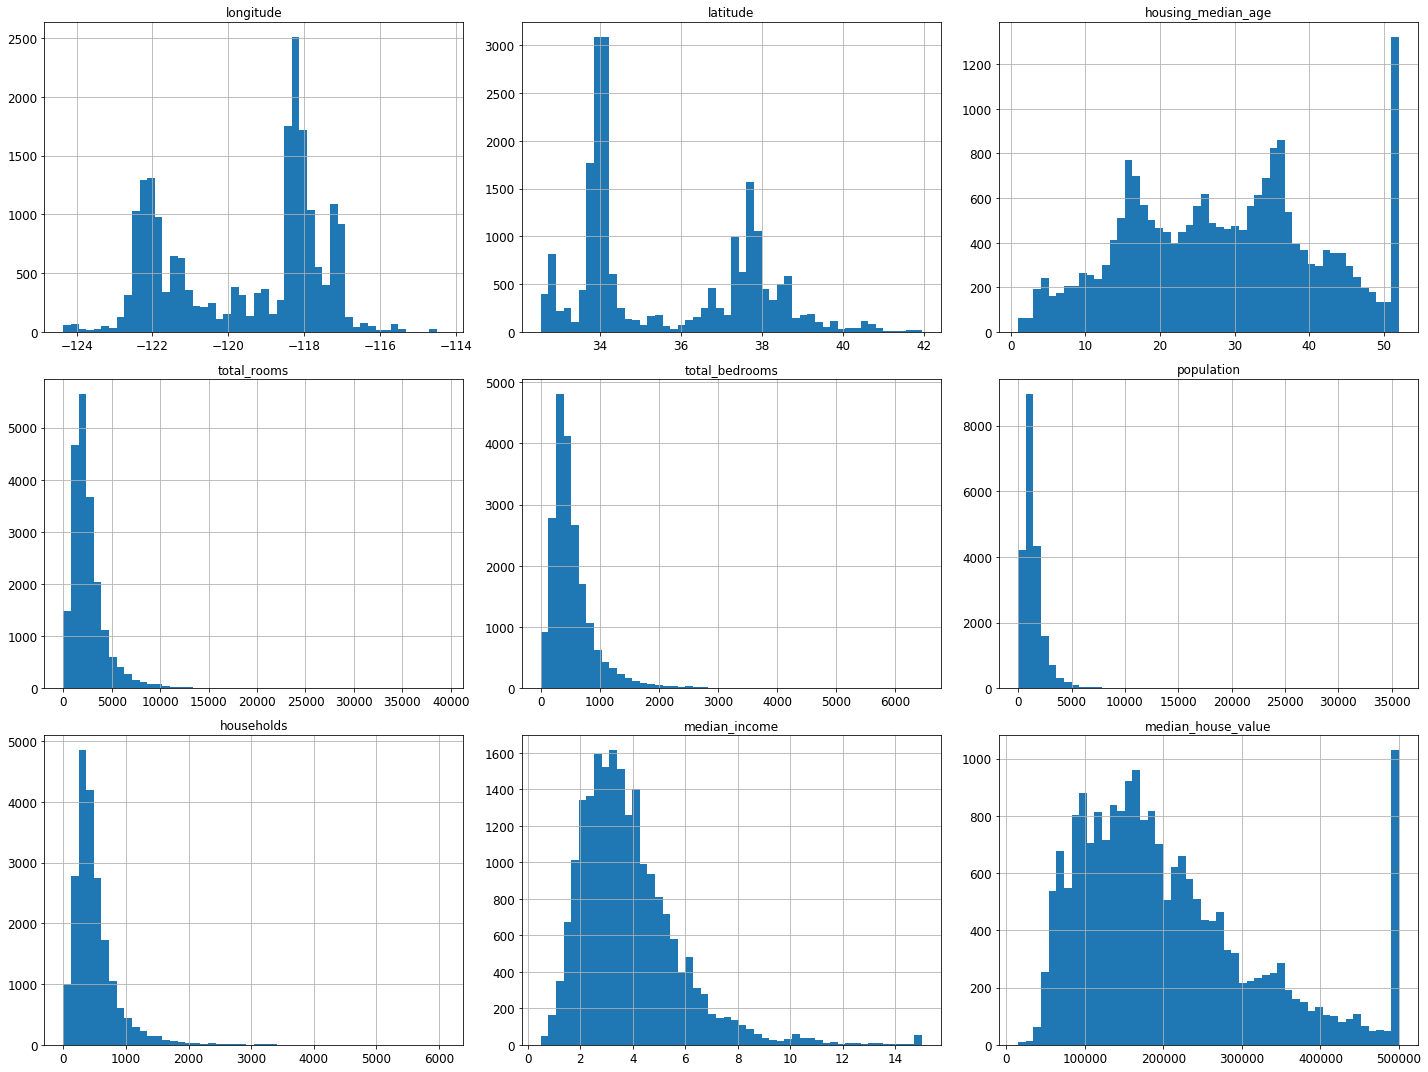

In [9]:
%matplotlib inline
#df_housing.hist(bins = 50, figsize = (20,15))
#plt.show()
float64attributes = [column for column in df_housing.columns.tolist() if df_housing[column].dtype != 'O']
fig, ax = plt.subplots(3,3, figsize = (20,15))

k = 0
for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i][j].hist(df_housing[float64attributes[k]], bins = 50)
        ax[i][j].set_title(float64attributes[k])
        ax[i][j].grid(b = True)
        k += 1

#ax[0].hist(df_housing['longitude'], bins = 50)
#plt.show()

plt.tight_layout()
plt.show()

<h2> Creating a Test Set </h2>

In [10]:
import numpy as np

def produce_test_train_set(data,test_ratio):
    indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = produce_test_train_set(df_housing, 0.2)

In [12]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set], in_test_set

In [13]:
housing_with_id = df_housing.reset_index()

In [14]:
housing_with_id.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY

In [15]:
train_set, test_set, test_indices = split_train_test_by_id(housing_with_id,0.2,"index")

Using the hash function method to calculate the checksum requires all row indices remain the same, and new data only gets appended. As this is impractical when rows have to be dropped, we need to make a unique ID for instance. 

In [16]:
#creating new column called "id" for each row
housing_with_id["id"] = df_housing["longitude"] * 1000 + df_housing['latitude']
train_set, test_set,_ = split_train_test_by_id(housing_with_id, 0.2, "id")

So far the methods of selecting the test set and train set have involved completely random sampling. This is fine as long as the dataset is large enough, however if it isnt, we can instroduce sampling bias. This is where the samples are not representative of the entire population. 

Hence we introduce **stratified sampling** where the population is subdivided into homogenous subgroups called strata. Depending on the size of the stratum (how many instances are in it), we sample it accordingly. 

In this case, we take the **median income** as an important attribute which will help us create homogenous subgroups that are representative of the population. 

In [17]:
df_housing.loc[(df_housing['median_income'] >= 0) 
               & (df_housing['median_income'] < 1.5), 'income_cat'] = 1
df_housing.loc[(df_housing['median_income'] >= 1.5) 
               & (df_housing['median_income'] < 3.0), 'income_cat'] = 2
df_housing.loc[(df_housing['median_income'] >= 3.0) 
               & (df_housing['median_income'] < 4.5), 'income_cat'] = 3
df_housing.loc[(df_housing['median_income'] >= 4.5) 
               & (df_housing['median_income'] < 6.0), 'income_cat'] = 4
df_housing.loc[(df_housing['median_income'] >= 6.0), 'income_cat'] = 5

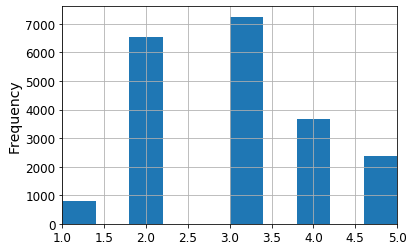

In [18]:
ax = plt.figure().add_subplot(111)
#count, bin_edges = np.histogram(df_housing['income_cat'], bins = 6)
df_housing['income_cat'].plot(kind = 'hist', ax = ax)
ax.set_xlim([1.0,5.0])
ax.grid()

As we have separated the median income into categories, we are ready to carry out stratified sampling

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df_housing, df_housing['income_cat']):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]


In [21]:
strat_train_set['income_cat'].value_counts(normalize = True)

3.0    0.351260
2.0    0.317345
4.0    0.176962
5.0    0.114947
1.0    0.039486
Name: income_cat, dtype: float64

In [22]:
strat_test_set['income_cat'].value_counts(normalize = True)

3.0    0.351260
2.0    0.317345
4.0    0.176841
5.0    0.115068
1.0    0.039486
Name: income_cat, dtype: float64

In [23]:
df_housing['income_cat'].value_counts(normalize = True)

3.0    0.351260
2.0    0.317345
4.0    0.176938
5.0    0.114971
1.0    0.039486
Name: income_cat, dtype: float64

The essence of stratified sampling is to ensure that both the test set and train set be representative of the original dataset with respect to the **selected homogenous subgroups**. The above *value_counts()* shows that the proportions of each category is the same showing that the test, train and orginal data are equal in representativeness. 



In [24]:
len(df_housing[df_housing['income_cat'] == 3].index)

7250

In [25]:
len(strat_train_set[strat_train_set['income_cat'] == 3].index)

5800

In [26]:
len(strat_test_set[strat_test_set['income_cat'] == 3].index)

1450

Using normal test_train_split

In [27]:
from sklearn.model_selection  import train_test_split

train_set, test_set = train_test_split(df_housing,test_size = 0.2, random_state = 42)

In [28]:
train_set['income_cat'].value_counts(normalize = True)

3.0    0.349261
2.0    0.316013
4.0    0.179021
5.0    0.116340
1.0    0.039365
Name: income_cat, dtype: float64

In [29]:
test_set['income_cat'].value_counts(normalize = True)

3.0    0.359254
2.0    0.322674
4.0    0.168605
5.0    0.109496
1.0    0.039971
Name: income_cat, dtype: float64

In [30]:
df_housing['income_cat'].value_counts(normalize = True)

3.0    0.351260
2.0    0.317345
4.0    0.176938
5.0    0.114971
1.0    0.039486
Name: income_cat, dtype: float64

The proportions of the homogeneous stratums are not the same in the test, train and overall dataset

In [31]:
strat_train_set.drop('income_cat',axis = 1, inplace = True)
strat_test_set.drop('income_cat',axis = 1, inplace = True)

<h1> Discover Insights In The Data</h1>

In [32]:
#to not harm our initial training set when doing manipulations to it, we make a copy
housing_train = strat_train_set.copy()

In [33]:
#we shall use folium to show a visualization
import folium as fl
from folium import plugins

cali_map = fl.Map(location = [34.052235, -118.243683], zoom_start = 6)
houseclusters = plugins.MarkerCluster().add_to(cali_map)

for lng,lat in zip(housing_train.longitude,housing_train.latitude):
    fl.Marker(location = [lat,lng]).add_to(houseclusters)
cali_map

The above visualization helps us see how many training instances we have in each given region. However it doesn't help us visualize how the housing price varies depending on the area. For this we use a simple scatter plot. 

However note that using a **geojson** file of California and the choropleth method of the folium library we are capable of producing a visualization described above. 

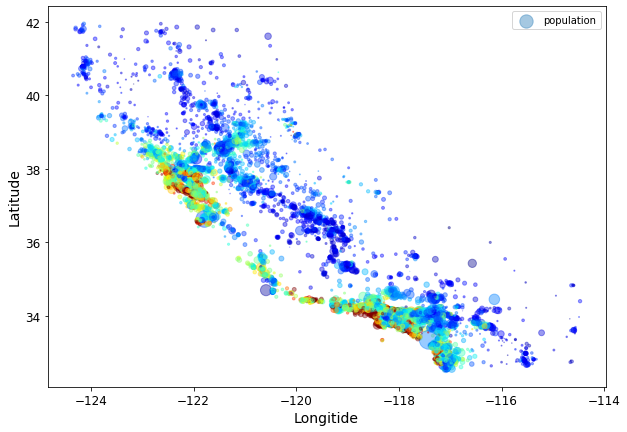

In [34]:
ax1 = plt.figure(figsize = (10,7)).add_subplot(111)
im = ax1.scatter(housing_train['longitude'], housing_train['latitude'], alpha = 0.4,
           s = housing_train['population']/100, label = 'population',
           c = housing_train['median_house_value'], cmap = plt.get_cmap('jet'))

ax1.set_xlabel('Longitide')
ax1.set_ylabel('Latitude')
fig.colorbar(im)
plt.legend()
plt.show()


<h1> Looking for correlations </h1>

In [35]:
corr_matrix = housing_train.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924406           -0.110271     0.046208   
latitude            -0.924406  1.000000            0.013167    -0.036300   
housing_median_age  -0.110271  0.013167            1.000000    -0.361847   
total_rooms          0.046208 -0.036300           -0.361847     1.000000   
total_bedrooms       0.070559 -0.067435           -0.319500     0.930540   
population           0.101778 -0.108950           -0.294295     0.852908   
households           0.058129 -0.072744           -0.302308     0.919858   
median_income       -0.017381 -0.076203           -0.115598     0.194623   
median_house_value  -0.045456 -0.144337            0.108851     0.131329   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070559    0.101778    0.058129      -0.017381   
latitude                 -0.067435   -0.108950   -0.072744      -0.076203   
housing_median_age       -0.319500   -0.294295   -0.302308      -0.115598   
total_rooms               0.930540    0.852908    0.919858       0.194623   
total_bedrooms            1.000000    0.874161    0.981022      -0.012690   
population                0.874161    1.000000    0.902343      -0.001087   
households                0.981022    0.902343    1.000000       0.008239   
median_income            -0.012690   -0.001087    0.008239       1.000000   
median_house_value        0.047040   -0.030342    0.062166       0.687446   

                    median_house_value  
longitude                    -0.045456  
latitude                     -0.144337  
housing_median_age            0.108851  
total_rooms                   0.131329  
total_bedrooms                0.047040  
population                   -0.030342  
households                    0.062166  
median_income                 0.687446  
median_house_value            1.000000

In [36]:
idx = corr_matrix['median_house_value'].argsort()[::-1]
#descending correlation values
sorted_correlations = corr_matrix['median_house_value'][idx]
sorted_correlations

median_house_value    1.000000
median_income         0.687446
total_rooms           0.131329
housing_median_age    0.108851
households            0.062166
total_bedrooms        0.047040
population           -0.030342
longitude            -0.045456
latitude             -0.144337
Name: median_house_value, dtype: float64

The most positive correlation is present between median_house_value and median_income with a Pearson Correlation of 0.687446

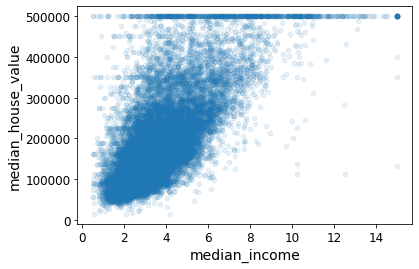

In [37]:
housing_train.plot(kind = 'scatter', x = 'median_income',y = 'median_house_value',alpha = 0.1)


While there is a clear positive correlation, there are horizontal lines which occur at 500,000 , 350,000 and 280,000 which needs to be removed prior building the model.

<h2>Experimenting with feature combinations</h2>

The attributes in this dataset are for the entire area block under consideration, hence attributes like **total_rooms**, **total_bedrooms** and **population** do not contribute to predicting the **median_house_value**. 

Hence we need to manipulate these attributes accordingly

In [38]:
housing_train['rooms_per_household'] = housing_train['total_rooms']/housing_train['households']
housing_train['bedrooms_per_room'] = housing_train['total_bedrooms']/housing_train['total_rooms']
housing_train['population_per_household'] = housing_train['population']/housing_train['households']

In [39]:
corr_matrix2 = housing_train.corr()
idx2 = corr_matrix2['median_house_value'].argsort()[::-1]
new_sorted_corr  = corr_matrix2['median_house_value'][idx2]
new_sorted_corr

median_house_value          1.000000
median_income               0.687446
rooms_per_household         0.156215
total_rooms                 0.131329
housing_median_age          0.108851
households                  0.062166
total_bedrooms              0.047040
population_per_household   -0.022300
population                 -0.030342
longitude                  -0.045456
latitude                   -0.144337
bedrooms_per_room          -0.250534
Name: median_house_value, dtype: float64

In [40]:
housing_features = strat_train_set.drop('median_house_value',axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [41]:
median_bedroomnum = housing_features['total_bedrooms'].median()
median_bedroomnum

434.0

In [42]:
housing_features['total_bedrooms'].replace(np.nan, median_bedroomnum, inplace = True)

In [43]:
housing_features['total_bedrooms'].isna().value_counts()

False    16512
Name: total_bedrooms, dtype: int64

In [44]:
from sklearn.impute import SimpleImputer
#calculates the median for each numeric variable
imputer = SimpleImputer(strategy = 'median')
housing_featuresnumeric = housing_features.drop('ocean_proximity',axis = 1)
#imputer will compute median for each attribute
imputer.fit(housing_featuresnumeric)
#it stores the median values in the statistics_ attribute of the imputer instance
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  434.    , 1163.    ,
        409.    ,    3.5417])

In [45]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [46]:
housing_cat = housing_features[["ocean_proximity"]]
housing_cat.head()

ocean_proximity
17262       <1H OCEAN
16799      NEAR OCEAN
16718       <1H OCEAN
5373        <1H OCEAN
20311      NEAR OCEAN

In [47]:
housing_features.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17262    -119.71     34.42                52.0       1411.0           324.0   
16799    -122.44     37.67                35.0       1814.0           365.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income ocean_proximity  
17262      1091.0       306.0         4.1062       <1H OCEAN  
16799      1025.0       384.0         4.4250      NEAR OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
5373       2054.0       758.0         2.0437       <1H OCEAN  
20311       522.0        83.0         2.0368      NEAR OCEAN

In [48]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [4.],
       [0.],
       [0.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [49]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)

In [51]:
housing_cat_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [52]:
housing_cat_encoded_normal = housing_cat_encoded.toarray()
housing_cat_encoded_normal

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Making Custom Transformers

In [53]:
from sklearn.base import BaseEstimator,TransformerMixin
#rooms_ic, bedrooms_ix,population_ix, households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X,y = None):
        return self #nothing to do on this 
    def transform(self, features,div_column, X):#accepts a list of column names that need to be added
        if type(div_column) == list\
        and type(features) == list\
        and (all(isinstance(v,str) for v in features))\
        and (all(isinstance(v,str) for v in div_column)):                                                    
            result = X
            for feature in features:
                res = X[feature]/X[div_column[0]]
                result = np.c_[result,res]
            #rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
            #population_per_household = X[:,population_ix]/X[:,households_ix]
            return result
        else:
            raise TypeError('features or div_column and their elements are not in list and string format respectively')
    
            

In [54]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix, bedrooms_ix,population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder2(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X,y = None):
        return self #nothing to do on this 
    def transform(self, X, y = None):#accepts a list of column names that need to be added
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [55]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)

In [56]:
housing_extra_attr = attr_adder.transform(features = ['total_rooms',
                                                      'population'],
                                         div_column = ['households'],
                                         X = housing_features)

In [57]:
housing_features.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17262    -119.71     34.42                52.0       1411.0           324.0   
16799    -122.44     37.67                35.0       1814.0           365.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income ocean_proximity  
17262      1091.0       306.0         4.1062       <1H OCEAN  
16799      1025.0       384.0         4.4250      NEAR OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
5373       2054.0       758.0         2.0437       <1H OCEAN  
20311       522.0        83.0         2.0368      NEAR OCEAN

In [58]:
#dealing with both numerical and categorical columns can be done using 
#ColumnTransformer group with a pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#the pipeline is only being used for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder2()),
    ('std_scaler', StandardScaler())])

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_features)[:-1] #provides all the numerical aatributes
#These values need to always be in a list and not single string values as then 
#it recognizes it as a Series rather than DF
cat_attribs = ["ocean_proximity"]

#creates a pipeline which can handle both numerical
#and categorical. This will apply the specified **TRANSFORMER OBJECT**
#onto the column names you have provided
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing_features)

housing_prepared

array([[-0.06764406, -0.57094951,  1.85663063, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43149467,  0.95093743,  0.50408653, ...,  0.        ,
         0.        ,  1.        ],
       [-0.54224409, -0.0698975 , -0.92801899, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.34157046,  1.15229477, -0.37108906, ...,  0.        ,
         1.        ,  0.        ],
       [-0.76705463,  0.85728285, -1.32582607, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62677072, -0.73952775,  1.85663063, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
housing_prepared[4,:]

array([ 0.23210333, -0.68801773,  0.66320937, -1.00208053, -1.03339391,
       -0.79434917, -1.09469887, -0.96537965,  0.09507847,  0.27455406,
        0.14541579,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [60]:
housing_features.iloc[0]

longitude               -119.71
latitude                  34.42
housing_median_age           52
total_rooms                1411
total_bedrooms              324
population                 1091
households                  306
median_income            4.1062
ocean_proximity       <1H OCEAN
Name: 17262, dtype: object

In [61]:
housing_features["ocean_proximity"].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'INLAND', 'ISLAND'],
      dtype=object)

<h1> Train the model </h1>

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
some_data = housing_features.iloc[:5,:]
some_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17262    -119.71     34.42                52.0       1411.0           324.0   
16799    -122.44     37.67                35.0       1814.0           365.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income ocean_proximity  
17262      1091.0       306.0         4.1062       <1H OCEAN  
16799      1025.0       384.0         4.4250      NEAR OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
5373       2054.0       758.0         2.0437       <1H OCEAN  
20311       522.0        83.0         2.0368      NEAR OCEAN

In [64]:
housing_labels.iloc[:5]

17262    252900.0
16799    268400.0
16718    171300.0
5373     309100.0
20311    243800.0
Name: median_house_value, dtype: float64

In [65]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-6.76440588e-02, -5.70949507e-01,  1.85663063e+00,
        -5.65446891e-01, -5.07854812e-01, -2.92026411e-01,
        -5.06701124e-01,  1.20886310e-01, -3.29726262e-01,
         3.97182724e-02,  2.38978417e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.43149467e+00,  9.50937427e-01,  5.04086533e-01,
        -3.78450764e-01, -4.09466213e-01, -3.50292320e-01,
        -3.01033750e-01,  2.88230270e-01, -2.84137833e-01,
        -3.75391987e-02, -1.88386518e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-5.42244089e-01, -6.98975012e-02, -9.28018986e-01,
         8.31687940e-01,  9.82372498e-01,  7.81478825e-01,
         1.01998361e+00, -5.49801823e-01, -1.73990958e-01,
        -4.29269580e-02, -4.91596998e-04,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.96795984e-01, -7.48893210e

In [66]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [277028.76392464 272272.62983281 213412.3292191  175030.20448802
 168816.3387319 ]


In [67]:
print("Labels:", list(housing_labels.iloc[:5]))

Labels: [252900.0, 268400.0, 171300.0, 309100.0, 243800.0]


In [68]:
#Measuring the regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error

housing_predicts = lin_reg.predict(housing_prepared)

In [69]:
# this is the mean square error summation((y - h(x))^2)
lin_reg_mse = mean_squared_error(housing_labels,housing_predicts)
# this is the root mean square error 
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_mse

4683245953.863533

This is a result of underfitting of the data

<h1> Try the Decision Tree Regressor </h1>

In [70]:
from sklearn.tree import DecisionTreeRegressor

#notice how even for decision trees we are using normalized data
#and one hot encoded data
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [71]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [72]:
dtreeregcomparison = pd.DataFrame(data = np.c_[housing_labels, housing_predictions],
                                 columns = ['Actual', 'Predicted'])
dtreeregcomparison.head()

Actual  Predicted
0  252900.0   252900.0
1  268400.0   268400.0
2  171300.0   171300.0
3  309100.0   309100.0
4  243800.0   243800.0

We have obtained a rmse of 0.0 which is quite surprising. Hence we need to evaluate if this is a result of overfitting or a valid model. 

- We could use train_test_split on the training set and then evaluate against the validation set after training on the smaller training set
- We could use cross_val_score to do K-fold cross validation

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring = 'neg_mean_squared_error', cv = 10)
scores

array([-4.85906759e+09, -5.19387272e+09, -4.78654307e+09, -4.53633869e+09,
       -5.27026802e+09, -5.30047141e+09, -5.00484441e+09, -5.77518599e+09,
       -6.19216926e+09, -4.41567330e+09])

In [74]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69707.01250091, 72068.52792472, 69184.84712709, 67352.34729514,
       72596.61161408, 72804.33645036, 70744.92499647, 75994.64447834,
       78690.33778131, 66450.53269264])

In [75]:
def print_results(scores):
    print("Scores:", scores)
    print("Mean of RMSE:", np.mean(scores))
    print("Standard deviation:", np.std(scores))

In [76]:
print_results(tree_rmse_scores)

Scores: [69707.01250091 72068.52792472 69184.84712709 67352.34729514
 72596.61161408 72804.33645036 70744.92499647 75994.64447834
 78690.33778131 66450.53269264]
Mean of RMSE: 71559.41228610734
Standard deviation: 3562.8581379795673


From the above evaluation we see that the Decision Tree Regressor does have significant RMSE values. Hence K-fold Cross validation bought out the issues in this model.

<h3> It is clear that the Decision Tree Regressor model is overfitting the training set </h3>

<h1> Comparing the cross_val_score results of lin_reg model </h1>

In [77]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                           scoring = 'neg_mean_squared_error', 
                           cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)

print_results(lin_rmse_scores)

Scores: [68814.39289626 70032.87025165 66676.72282748 69312.12766362
 68884.23142928 70141.99449192 71138.87179744 69122.98775985
 71607.46514582 62803.7155071 ]
Mean of RMSE: 68853.5379770418
Standard deviation: 2397.541835942138


Decision Tree Regressor has a RMSE of 71363 +/- 3237

Linear Regression has a RMSE of 68853 +/- 2397

In [78]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions_forest = forest_reg.predict(housing_prepared)
housing_predictions_forest

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([238250. , 273020. , 163820. , ..., 115080. , 145450. , 416680.5])

In [79]:
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions_forest))
forest_rmse

22337.427807221546

In [80]:
forest_rmse_scores = cross_val_score(forest_reg,
                                     housing_prepared,
                                     housing_labels,
                                     scoring = 'neg_mean_squared_error',
                                     cv = 10)
print_results(np.sqrt(-forest_rmse_scores))

Scores: [51692.98241035 52297.4500355  51657.20564591 52005.11754912
 54384.91835522 54489.66687059 53980.89334128 52511.18699093
 56367.65979639 49299.5022241 ]
Mean of RMSE: 52868.658321939896
Standard deviation: 1876.0401187401317


Now we have 3 possible models to use, however the above process was only to shortlist a few models. We can test other models and further shortlist the best models.

<h1> Fine tuning the models </h1>

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features' : [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators' : [3,10], 'max_features' : [2,3,4]}
]

#notice that we have used 2 sets of parameters to be applied for the same 
#regressor

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error', 
                          return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


For the first set of parameters there will be 3 x 4 runs. For the second set of parameters there will be 2 x 3 runs. That is 18 runs for varying combinations of hyperparameters. However there will be 5 fold cross validation, hence each model combinations will be run 5 times. Resulting in 90 total runs. 

In [88]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [89]:
cvresults = grid_search.cv_results_
for mean_score,params in zip(cvresults['mean_test_score'],
                            cvresults['params']):
    print(np.sqrt(-mean_score),params)

63486.86937491756 {'max_features': 2, 'n_estimators': 3}
55578.58913047852 {'max_features': 2, 'n_estimators': 10}
53222.341276499676 {'max_features': 2, 'n_estimators': 30}
60254.41027456326 {'max_features': 4, 'n_estimators': 3}
53076.72843614024 {'max_features': 4, 'n_estimators': 10}
50552.672692844164 {'max_features': 4, 'n_estimators': 30}
60015.6734249113 {'max_features': 6, 'n_estimators': 3}
52117.18114140056 {'max_features': 6, 'n_estimators': 10}
50260.759714629035 {'max_features': 6, 'n_estimators': 30}
58695.143192594944 {'max_features': 8, 'n_estimators': 3}
52088.95827175271 {'max_features': 8, 'n_estimators': 10}
50311.92050826542 {'max_features': 8, 'n_estimators': 30}
62092.059275852305 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54447.9187603389 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59440.98747372452 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52581.59210414158 {'bootstrap': False, 'max_features': 3, 'n_estimators':

<h1> Investigating the importance of the attributes of the best_estimator_ </h1>

In [98]:
attribute_importance = grid_search.best_estimator_.feature_importances_
attribute_importance

array([7.41550537e-02, 6.79825347e-02, 4.09774180e-02, 1.78831894e-02,
       1.65356893e-02, 1.79369001e-02, 1.58015177e-02, 3.08326386e-01,
       7.16325032e-02, 1.03795924e-01, 7.45883150e-02, 1.54623605e-02,
       1.66157896e-01, 1.70603114e-04, 3.34053996e-03, 5.25316998e-03])

In [99]:
#displaying the importance scores next to their attributes
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#allows you to retrieve the object(transformer) used in the column transformer
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_encoder

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [103]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [104]:
all_attributes = num_attribs + extra_attribs + cat_one_hot_attribs
all_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [106]:
#sorted(zip(attribute_importance,))
attrib_imp = list(tuple(zip(attribute_importance, all_attributes)))
attrib_imp

[(0.0741550536520917, 'longitude'),
 (0.06798253467262587, 'latitude'),
 (0.04097741799846675, 'housing_median_age'),
 (0.017883189416430863, 'total_rooms'),
 (0.016535689285677006, 'total_bedrooms'),
 (0.017936900058919306, 'population'),
 (0.0158015177132496, 'households'),
 (0.3083263859504717, 'median_income'),
 (0.07163250317395171, 'rooms_per_hhold'),
 (0.10379592386609414, 'pop_per_hhold'),
 (0.07458831497488037, 'bedrooms_per_room'),
 (0.015462360465247758, '<1H OCEAN'),
 (0.1661578957263415, 'INLAND'),
 (0.0001706031138326664, 'ISLAND'),
 (0.0033405399565544446, 'NEAR BAY'),
 (0.00525316997516458, 'NEAR OCEAN')]

In [113]:
attrib_imp.sort(key=lambda elem: elem[0], reverse = True)

In [114]:
attrib_imp

[(0.3083263859504717, 'median_income'),
 (0.1661578957263415, 'INLAND'),
 (0.10379592386609414, 'pop_per_hhold'),
 (0.07458831497488037, 'bedrooms_per_room'),
 (0.0741550536520917, 'longitude'),
 (0.07163250317395171, 'rooms_per_hhold'),
 (0.06798253467262587, 'latitude'),
 (0.04097741799846675, 'housing_median_age'),
 (0.017936900058919306, 'population'),
 (0.017883189416430863, 'total_rooms'),
 (0.016535689285677006, 'total_bedrooms'),
 (0.0158015177132496, 'households'),
 (0.015462360465247758, '<1H OCEAN'),
 (0.00525316997516458, 'NEAR OCEAN'),
 (0.0033405399565544446, 'NEAR BAY'),
 (0.0001706031138326664, 'ISLAND')]

<h1> Applying Model to Test Set </h1>

In [115]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

#applied imputer, attribute adder and standard scaler to numerical attributes
#applies one hot encoding to categorical attributes (ocean proximity)
x_test_prepped = full_pipeline.transform(X_test)

final_prediction = final_model.predict(x_test_prepped)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

48324.66974891506

<h3>Note that this is the Final Set and we do not do cross validation on this as we do not want to train our model on this data. We only want to transform and apply the features to obtain the prediction.</h3>

It is expected that the performance would be slightly worse as compared to your cross validation results. In validation results, your model has already been fine tuned for those data after countless training for that data.